In [240]:
import matplotlib.pyplot as plt
import numpy as np

In [241]:
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)

x,y = np.meshgrid(x,y)

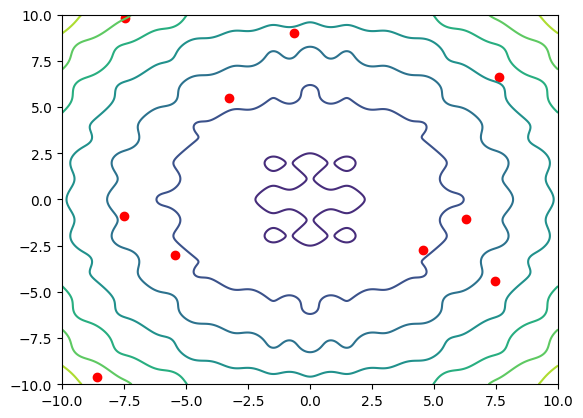

In [242]:
z = 0.2 * (x**2 + y**2) + 0.8 * np.sin(2 * x)**2 - 0.7 * np.cos(3 * y) -1

wolves = np.random.uniform(-10,10,(10,2))

best = None
prev_best = None

fig,ax = plt.subplots()

ax.contour(x,y,z)
ax.scatter(wolves[:,0],wolves[:,1],color='red')

In [243]:
fitness = lambda wolf : 0.2 * (wolf[0]**2 + wolf[1]**2) + 0.8 * np.sin(2 * wolf[0])**2 - 0.7 * np.cos(3 * wolf[1]) -1

In [244]:
fitness([0,0])

-1.7

In [245]:
def iter(guides,wolves,i,a):
    r = np.random.uniform(0,1,(3,2,2))

    A = 2 * a * r[:,0] - a
    c = 2 * r[:,1]

    D = np.abs((guides * c) - wolves[i])

    X = guides - A * D

    wolves[i] = np.clip(np.mean(X,axis=0),-10,10)

346


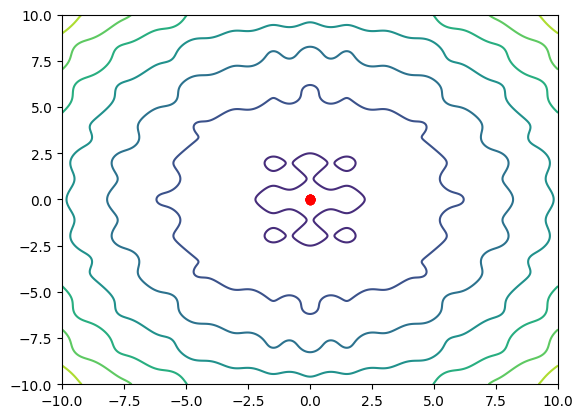

In [246]:
iteration = 0

while True:

    fitness_scores = [fitness(wolf) for wolf in wolves]
    rank = np.argsort(fitness_scores)

    guides = np.array([wolves[np.where(rank==i)][0].tolist() for i in range(3)])

    try:
        prev_best = best
        best = guides[0]
        # a -= 0.01 * np.abs(fitness(best)-fitness(prev_best))
        if np.linalg.norm(best-prev_best) < 1e-4:
            break
    except:
        a = 2

    best = guides[0]
    for i in range(len(wolves)): 
        iter(guides,wolves,i,a)
    iteration+=1

fig,ax = plt.subplots()


ax.contour(x,y,z)
ax.scatter(wolves[:,0],wolves[:,1],color='red')

print(iteration)
